In [1]:
using PyPlot,JLD2,Statistics
include("CGS.jl")

Main.CGS

In [9]:
# include("decompose_ttvs.jl")
# include("plot_likelihood.jl")
# include("plot_emcee.jl")
include("corner_plot.jl")
include("plot_ttvs.jl")
include("print_vals.jl")

get_vals (generic function with 1 method)

In [239]:
corner_hist(30.0,30.0,"EMB","p4",50,true)

In [ ]:
plot_res(10.0,30.0,"noEMB","p4",false)

In [10]:
print_vals(30.0,30.0,"EMB","p3")

           Fitted posterior params from MCMC/fromEMB/p3_mcmc30.0s30.0yrs.jld2
mu_1 : 2.532381230519062e-6 ± 1.9793204170557807e-7
P_1 : 224.70078022351777 ± 4.727606737184696e-6
t01 : 2.4335037653482673e6 ± 0.00013191172186248577
ecos1 : -0.0012968789964652883 ± 0.008238746377692077
esin1 : 0.0017667356781238392 ± 0.007310207564480265
mu_2 : 3.0260151510976992e-6 ± 1.3600326921059227e-7
P_2 : 365.2564541269282 ± 1.0701982063488287e-5
t02 : 2.4336244021719606e6 ± 0.00018195964140642375
ecos2 : 0.01304615236282719 ± 0.006564393730957955
esin2 : 0.00376761269236673 ± 0.005856689624503638
mu_3 : 0.000709037734222076 ± 0.00014815059009659097
P_3 : 4204.25959710014 ± 60.45846469684643
t03 : 2.439090689701409e6 ± 100.30108064280242
ecos3 : -0.0034108637649923976 ± 0.032711911735777484
esin3 : -0.037050230668573804 ± 0.02082607488354748
σ_sys2 : 9.364261795690401e-8 ± 3.897024074198955e-8
Derived Parameters
mu_1 * M_star: 0.8430758389414436 ± 0.06589518201417066
ecc : 0.00884741468226464 ± 0.0

### BIC calculation from fit routine

In [6]:
BIC(chi2,k,Nobs) = chi2 + k*log(Nobs)

BIC (generic function with 1 method)

### Results

In [501]:
planets=["Venus", "Earth", "Mars","Jupiter" ]
vals=[0.815, 1, 0.1074, 317.8]
function plot_masses(iplanet,color,fmt::String,g90::Bool)
    axhline(vals[iplanet],linestyle="--",color="black")
    errorbar(10,M10[iplanet],M10_er[iplanet],fmt=fmt,color=color,capsize=4)
    errorbar(30,M30[iplanet],M30_er[iplanet],fmt=fmt,color=color,capsize=4)
    errorbar(60,M60[iplanet],M60_er[iplanet],fmt=fmt,color=color,capsize=4)
    if g90
        errorbar(90,M90[iplanet],M90_er[iplanet],fmt=fmt,color=color,capsize=4)
        errorbar(120,M120[iplanet],M120_er[iplanet],fmt=fmt,color=color,capsize=4)
        ylim(0,M120[iplanet]*2)
    end
    xlim(0,180)
    xlabel(L"$\sigma_{ij}$ (seconds)")
    minorticks_on()
    tick_params(which="both",direction="in",right="true",top="true")
end
function plot_effect(fmt,g90::Bool=false)
    fig=figure(figsize=(8,6))
    subplot(131)
    plot_masses(4,"firebrick",fmt,g90)
    ylabel(L"Recovered Planet 3 Mass [$M_{Earth}$]")
    text(130,300,"Jupiter")
    ylim(0,350)
    subplot(132)
    plot_masses(2,"green",fmt,g90)
    ylabel(L"Recovered Planet 2 Mass [$M_{Earth}$]")
    text(130,1.02,"Earth")
    ylim(0,1.2)
    subplot(133)
    plot_masses(1,"orange",fmt,g90)
    ylabel(L"Recovered Planet 1 Mass [$M_{Earth}$]")
    text(130,0.84,"Venus")
    ylim(0,1.8)
    tight_layout()
end

plot_effect (generic function with 4 methods)

In [482]:
# M10, M10_er, P10, P10_er = print_vals(10.0,30.0,"EMB","p3")
# M30, M30_er, P30, P30_er = print_vals(30.0,30.0,"EMB","p3")
# M60, M60_er, P60, P60_er = print_vals(60.0,30.0,"EMB","p3")
# M90, M90_er, P90, P90_er = print_vals(90.0,30.0,"EMB","p3")
M120, M120_er, P120, P120_er = print_vals(120.0,30.0,"EMB","p3")
# plot_effect("o",true)

([0.9332773310677523, 0.9486364447420331, 1.759665847807534e15], [0.24673095333330664, 0.16233471297341986, 7.357958349600916e17], [224.7007931863336, 365.2564435062693, 3.215941308661018e17], [1.7117565802166677e-5, 4.4678158305179134e-5, 9.058849424805395e17])

In [481]:
# M10, M10_er, P10, P10_er = print_vals(10.0,30.0,"noEMB","p3")
# M30, M30_er, P30, P30_er = print_vals(30.0,30.0,"noEMB","p3")
# M60, M60_er, P60, P60_er = print_vals(60.0,30.0,"noEMB","p3")
# M90, M90_er, P90, P90_er = print_vals(90.0,30.0,"noEMB","p3")
M120, M120_er, P120, P120_er = print_vals(120.0,30.0,"noEMB","p3")
# plot_effect(".",true)

([1.5728044296607246, 0.9071959712733765, -5.251741470139437e17], [0.279018256232577, 0.12136541724198108, 6.657106955258371e18], [224.7007896317639, 365.25644329763264, 2.3156535275509233e18], [2.052287489566717e-5, 5.0549234630897434e-5, 1.4533094075132183e18])

In [480]:
# M10, M10_er, P10, P10_er = print_vals(10.0,30.0,"noEMB","moon")
# M30, M30_er, P30, P30_er = print_vals(30.0,30.0,"noEMB","moon")
# M60, M60_er, P60, P60_er = print_vals(60.0,30.0,"noEMB","moon")
# M90, M90_er, P90, P90_er = print_vals(90.0,30.0,"noEMB","moon")
M120, M120_er, P120, P120_er = print_vals(120.0,30.0,"noEMB","moon")
# plot_effect("s",true)

([1.3326269181767176, 0.9128247988851493, 541458.5667462216], [0.5011730032290336, 0.18071167077075034, 6.429771868023664e6], [224.70079179500874, 365.25647042275125, 3.943095681232996e7], [1.8044971006692226e-5, 0.00011268827280831733, 2.761197838995112e8])

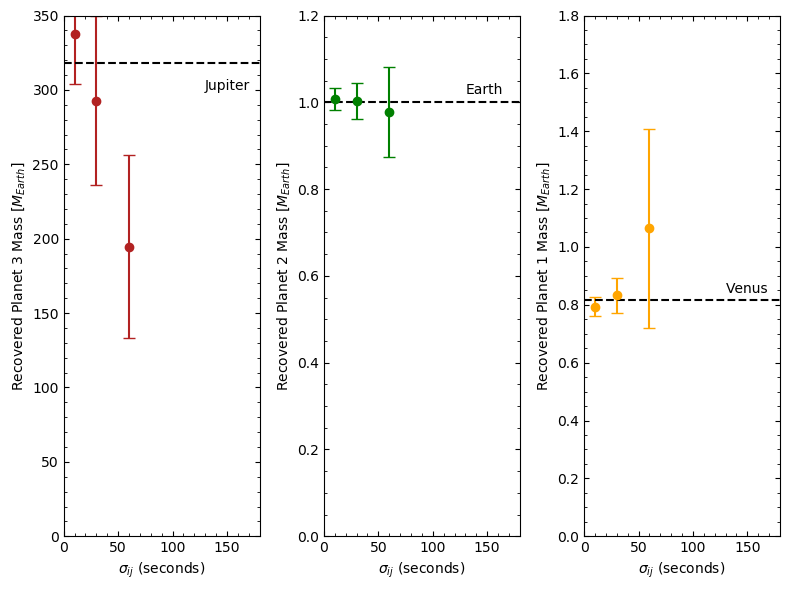

In [529]:
M10, M10_er, P10, P10_er = print_vals(10.0,30.0,"EMB","p4")
M30, M30_er, P30, P30_er = print_vals(30.0,30.0,"EMB","p4")
M60, M60_er, P60, P60_er = print_vals(60.0,30.0,"EMB","p4")
plot_effect("o")

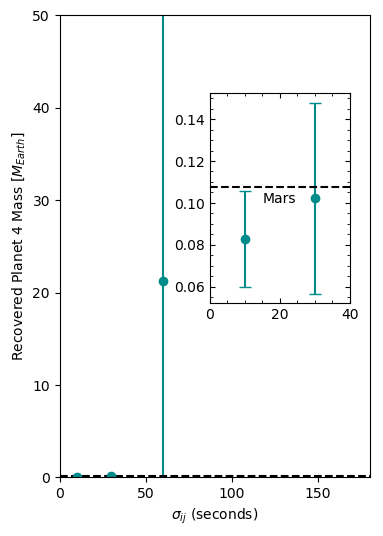

In [547]:
fig=figure(figsize=(4,6))
errorbar(10,M10[3],M10_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(30,M30[3],M30_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(60,M60[3],M60_er[3],fmt="o",color="darkcyan",capsize=4)
axhline(vals[3],linestyle="--",color="black")
ylabel(L"Recovered Planet 4 Mass [$M_{Earth}$]")
xlabel(L"$\sigma_{ij}$ (seconds)")
xlim(0,180)
ylim(0,50)
ax2 = fig.add_axes([0.5,0.4,0.35,0.35])
errorbar(10,M10[3],M10_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(30,M30[3],M30_er[3],fmt="o",color="darkcyan",capsize=4)
axhline(vals[3],linestyle="--",color="black")
ax2.text(15,0.1,"Mars")
minorticks_on()
xlim(0,40)
tick_params(which="both",direction="in",right="true",top="true")

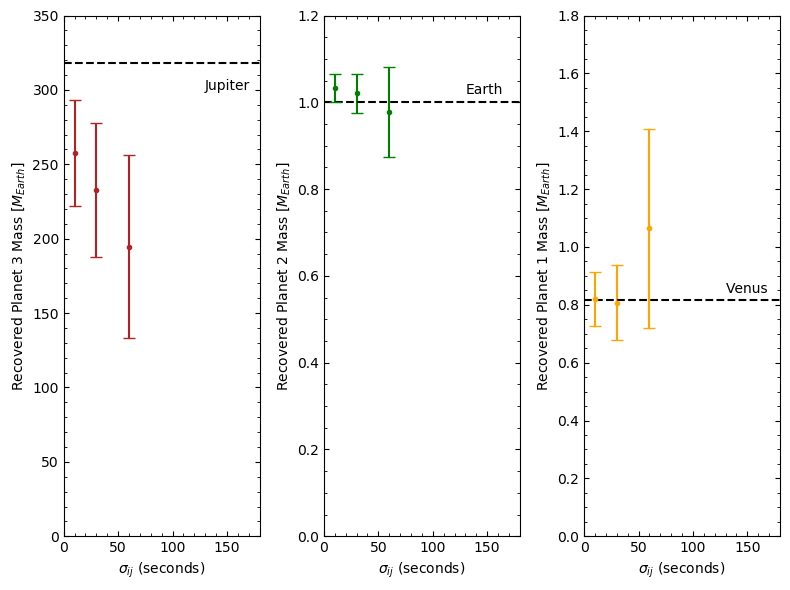

In [522]:
M10, M10_er, P10, P10_er = print_vals(10.0,30.0,"noEMB","p4")
M30, M30_er, P30, P30_er = print_vals(30.0,30.0,"noEMB","p4")
M60, M60_er, P60, P60_er = print_vals(60.0,30.0,"noEMB","p4")
plot_effect(".")

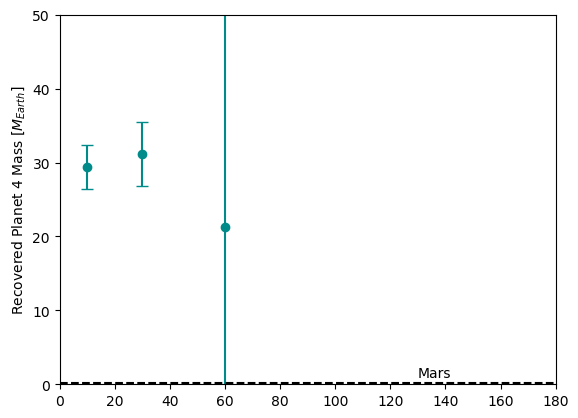

(0, 50)

In [527]:
errorbar(10,M10[3],M10_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(30,M30[3],M30_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(60,M60[3],M60_er[3],fmt="o",color="darkcyan",capsize=4)
axhline(vals[3],linestyle="--",color="black")
text(130,1,"Mars")
ylabel(L"Recovered Planet 4 Mass [$M_{Earth}$]")
xlim(0,180)
ylim(0,50)

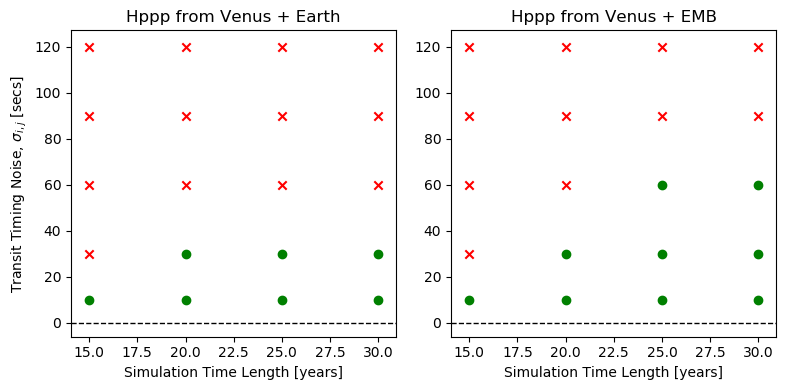

In [20]:
figure(figsize=(8,4)) 
# suptitle("Giant Planet Search Results")
ax1=subplot(121) # from no EMB
ax1.scatter(15,10,marker="o",color="green",label=L"$\geq3\sigma$ Detection")
# ax1.scatter(1+0.1,1,marker="o",color="green")
ax1.scatter(20,10,marker="o",color="green")
ax1.scatter(25,10,marker="o",color="green")
ax1.scatter(30,10,marker="o",color="green")
ax1.scatter(15,30,marker="x",color="red")#,label=L"$< 3\sigma$ Detection")
ax1.scatter(20,30,marker="o",color="green")
ax1.scatter(25,30,marker="o",color="green")
ax1.scatter(30,30,marker="o",color="green")
ax1.scatter(15,60,marker="x",color="red")
ax1.scatter(20,60,marker="x",color="red")
ax1.scatter(25,60,marker="x",color="red")
ax1.scatter(30,60,marker="x",color="red")
ax1.scatter(15,90,marker="x",color="red")#label="No detection/ not enough steps"
ax1.scatter(20,90,marker="x",color="red")
ax1.scatter(25,90,marker="x",color="red")
ax1.scatter(30,90,marker="x",color="red")
ax1.scatter(15,120,marker="x",color="red")
ax1.scatter(20,120,marker="x",color="red")
ax1.scatter(25,120,marker="x",color="red")
ax1.scatter(30,120,marker="x",color="red")
ax1.axhline(0,linestyle="--",color="black",linewidth=1)
ax1.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax1.set_xlabel("Simulation Time Length [years]")
# ax1.text(.5,5.5,"a)")
ax1.set_title("Hppp from Venus + Earth")
ax2=subplot(122)
ax2.scatter(15,10,marker="o",color="green",label=L"$\geq3\sigma$ EMB Detection")
ax2.scatter(20,10,marker="o",color="green")
ax2.scatter(25,10,marker="o",color="green")
ax2.scatter(30,10,marker="o",color="green")
ax2.scatter(15,30,marker="x",color="red")
ax2.scatter(20,30,marker="o",color="green")
ax2.scatter(25,30,marker="o",color="green")
ax2.scatter(30,30,marker="o",color="green")
ax2.scatter(15,60,marker="x",color="red")
ax2.scatter(20,60,marker="x",color="red")
ax2.scatter(25,60,marker="o",color="green")
ax2.scatter(30,60,marker="o",color="green")
ax2.scatter(15,90,marker="x",color="red")
ax2.scatter(20,90,marker="x",color="red")
ax2.scatter(25,90,marker="x",color="red")
ax2.scatter(30,90,marker="x",color="red")
ax2.scatter(15,120,marker="x",color="red")
ax2.scatter(20,120,marker="x",color="red")
ax2.scatter(25,120,marker="x",color="red")
ax2.scatter(30,120,marker="x",color="red")
ax2.axhline(0,linestyle="--",color="black",linewidth=1)
# ax1.scatter(1.25,5,marker="+",label="Additional",color="red")
# ax2.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax2.set_xlabel("Simulation Time Length [years]")
ax2.set_title("Hppp from Venus + EMB")
tight_layout()
show()
# make yaxis evenly spaced... dashed line at 0

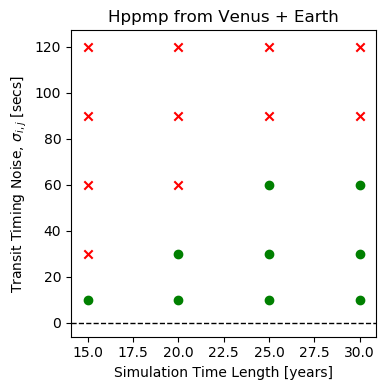

In [26]:
fig=figure(figsize=(4,4)) #Moon detections from EV times
ax3=gca()
ax3.scatter(15,10,marker="o",color="green",label=L"$\geq3\sigma$ EMB Detection")
# ax2.scatter(1+0.1,1,marker="o",color="green")
ax3.scatter(20,10,marker="o",color="green")
ax3.scatter(25,10,marker="o",color="green")
ax3.scatter(30,10,marker="o",color="green")
ax3.scatter(15,30,marker="x",color="red")
ax3.scatter(20,30,marker="o",color="green")
ax3.scatter(25,30,marker="o",color="green")
ax3.scatter(30,30,marker="o",color="green")
ax3.scatter(15,60,marker="x",color="red")
ax3.scatter(20,60,marker="x",color="red")
ax3.scatter(25,60,marker="o",color="green")
ax3.scatter(30,60,marker="o",color="green")
ax3.scatter(15,90,marker="x",color="red")
ax3.scatter(20,90,marker="x",color="red")
ax3.scatter(25,90,marker="x",color="red")
ax3.scatter(30,90,marker="x",color="red")
ax3.scatter(15,120,marker="x",color="red")
ax3.scatter(20,120,marker="x",color="red")
ax3.scatter(25,120,marker="x",color="red")
ax3.scatter(30,120,marker="x",color="red")
ax3.axhline(0,linestyle="--",color="black",linewidth=1)
# ax1.scatter(1.25,5,marker="+",label="Additional",color="red")
ax3.set_xlabel("Simulation Time Length [years]")
ax3.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
# ax2.text(.5,5.5,"b)")
ax3.set_title("Hppmp from Venus + Earth")
tight_layout()
show()

In [ ]:
figure(figsize=(8,4)) 
title("Terrestrial Planet Search Results")
ax1=subplot(121) # from no EMB
ax1.scatter(1,1,marker="o",color="green",label=L"$\geq3\sigma$ Detection")
# ax1.scatter(1+0.1,1,marker="o",color="green")
ax1.scatter(2,1,marker="o",color="green")
ax1.scatter(3,1,marker="o",color="green")
ax1.scatter(4,1,marker="o",color="green")
ax1.scatter(1,2,marker="o",color="green")#,label=L"$< 3\sigma$ Detection")
ax1.scatter(2,2,marker="o",color="green")
ax1.scatter(3,2,marker="o",color="green")
ax1.scatter(4,2,marker="o",color="green")
ax1.scatter(1,3,marker="o",color="green")
ax1.scatter(2,3,marker="o",color="green")
ax1.scatter(3,3,marker="o",color="green")
ax1.scatter(4,3,marker="x",color="red")
ax1.scatter(1,4,marker="x",color="red")#label="No detection/ not enough steps"
ax1.scatter(2,4,marker="x",color="red")
ax1.scatter(3,4,marker="x",color="red")
ax1.scatter(4,4,marker="x",color="red")
ax1.scatter(1,5,marker="x",color="red")
ax1.scatter(2,5,marker="x",color="red")
ax1.scatter(3,5,marker="x",color="red")
ax1.scatter(4,5,marker="x",color="red")
ax1.axhline(0,linestyle="--",color="black",linewidth=1)
ax1.set_xlabel("Simulation Time Length [years]")
ax1.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax1.set_title("Hpppp from Venus + Earth")
ax2=subplot(122)
ax2.scatter(1,1,marker="o",color="green",label=L"$\geq3\sigma$ EMB Detection")
ax2.scatter(2,1,marker="o",color="green")
ax2.scatter(3,1,marker="o",color="green")
ax2.scatter(4,1,marker="o",color="green")
ax2.scatter(1,2,marker="o",color="green")#,label=L"$< 3\sigma$ Detection")
ax2.scatter(2,2,marker="o",color="green")
ax2.scatter(3,2,marker="o",color="green")
ax2.scatter(4,2,marker="o",color="green")
ax2.scatter(1,3,marker="o",color="green")
ax2.scatter(2,3,marker="x",color="red")
ax2.scatter(3,3,marker="o",color="green")
ax2.scatter(4,3,marker="x",color="red")
ax2.scatter(1,4,marker="x",color="red")#label="No detection/ not enough steps"
ax2.scatter(2,4,marker="x",color="red")
ax2.scatter(3,4,marker="x",color="red")
ax2.scatter(4,4,marker="x",color="red")
ax2.scatter(1,5,marker="x",color="red")
ax2.scatter(2,5,marker="x",color="red")
ax2.scatter(3,5,marker="x",color="red")
ax2.scatter(4,5,marker="x",color="red")
ax2.axhline(0,linestyle="--",color="black",linewidth=1)
ax2.set_xlabel("Simulation Time Length [years]")
ax2.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax2.set_title("Hppp from Venus + EMB")
# ax1.legend()
tight_layout()
show()

Loading...MCMC/p4_mcmc10.0s30.0yrs.jld2 and FITS/p4_fit10.0s30.0yrs.jld2
Loading...MCMC/p4_mcmc10.0s25.0yrs.jld2 and FITS/p4_fit10.0s25.0yrs.jld2
MCMC or FITS file for noEMB with p4 model at 10.0 secs and 20.0 yrs doesn't exist!!!!
Loading...MCMC/p4_mcmc10.0s15.0yrs.jld2 and FITS/p4_fit10.0s15.0yrs.jld2
Loading...MCMC/p4_mcmc30.0s30.0yrs.jld2 and FITS/p4_fit30.0s30.0yrs.jld2
Loading...MCMC/p4_mcmc30.0s25.0yrs.jld2 and FITS/p4_fit30.0s25.0yrs.jld2
MCMC or FITS file for noEMB with p4 model at 30.0 secs and 20.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 30.0 secs and 15.0 yrs doesn't exist!!!!
Loading...MCMC/p4_mcmc60.0s30.0yrs.jld2 and FITS/p4_fit60.0s30.0yrs.jld2
MCMC or FITS file for noEMB with p4 model at 60.0 secs and 25.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 60.0 secs and 20.0 yrs doesn't exist!!!!
Loading...MCMC/p4_mcmc60.0s15.0yrs.jld2 and FITS/p4_fit60.0s15.0yrs.jld2
MCMC or FITS file for 

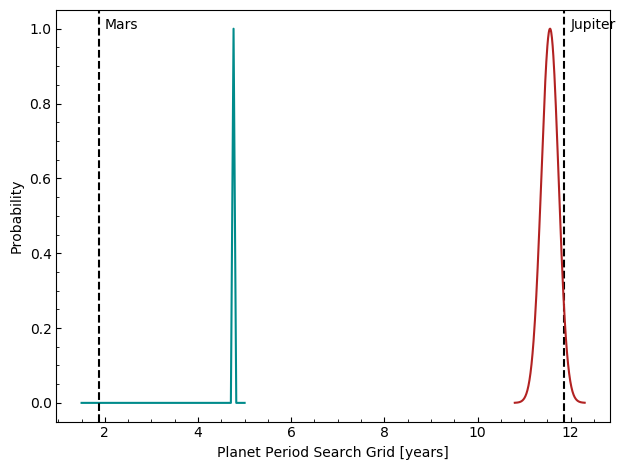

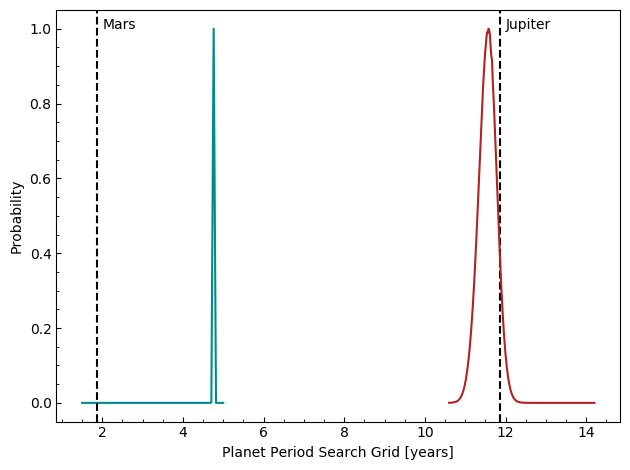

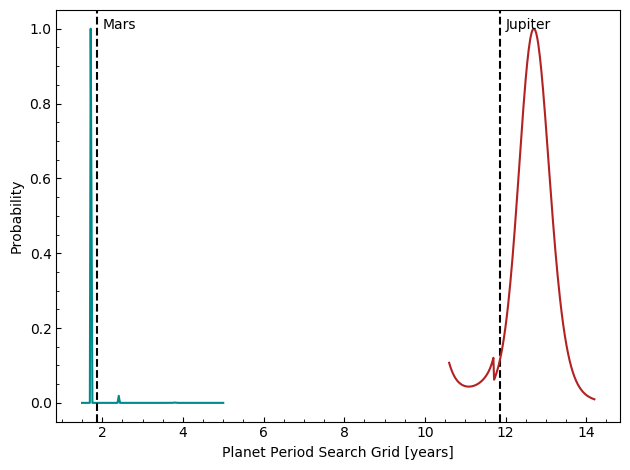

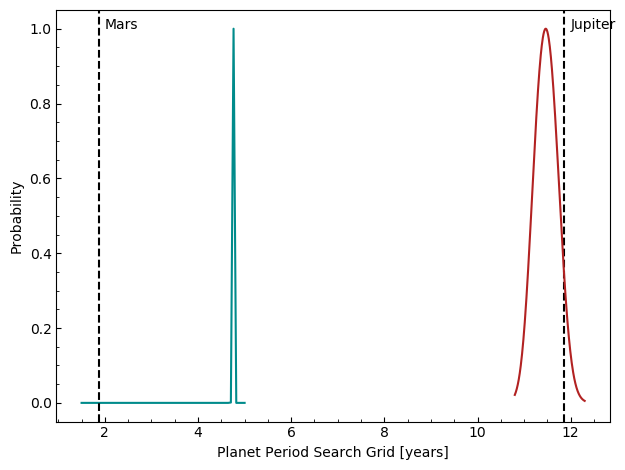

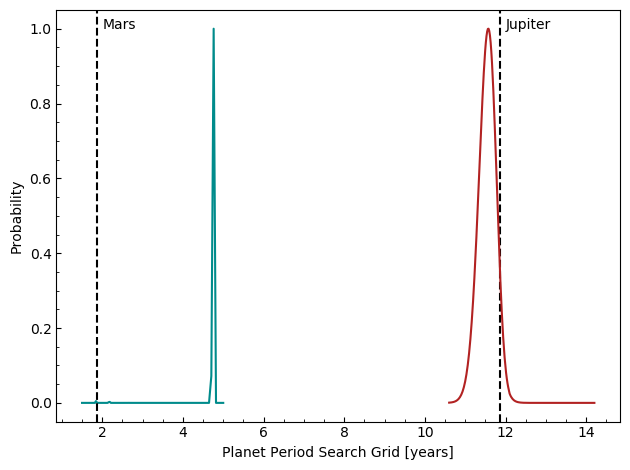

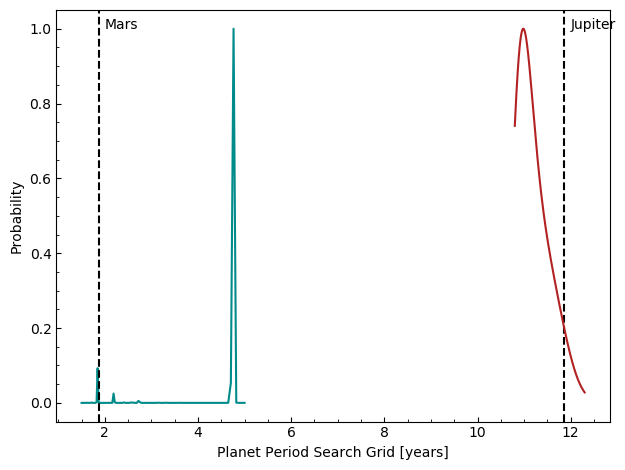

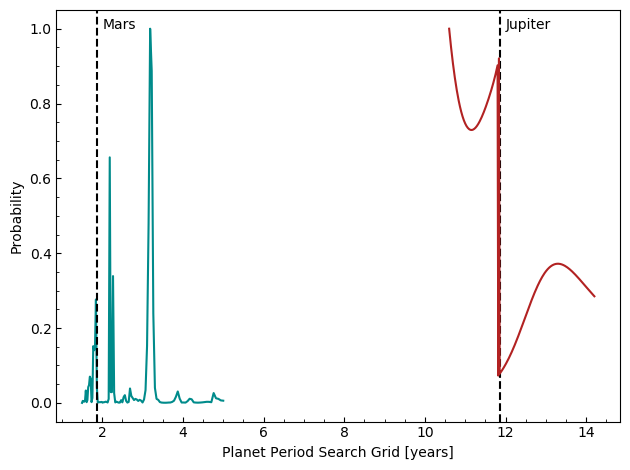

noEMB with p4 model at 90.0 secs and 30.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 90.0 secs and 25.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 90.0 secs and 20.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 90.0 secs and 15.0 yrs doesn't exist!!!!


In [199]:
# include("plot_emcee.jl")
# include("corner_plot.jl")
include("plot_likelihood.jl")
# include("plot_ttvs.jl")
sigs=[10.0,30.0,60.0,90.0]#,120.0]
years=[30.0,25.0,20.0,15.0]
for i=1:length(sigs)
    for j=1:length(years)
# plot_emcee(sigs[i],years[j],"noEMB","moon",true)
# corner_plot(sigs[i],years[j],"noEMB","moon",50,true) #still need to run moon true
plot_likelihood(sigs[i],years[j],"noEMB","p4","p4",50) 
# plot_ttvs(sigs[i],years[i],"EMB","p3",false) 
    end
end

### Added M_p > 0 prior to MCMC.jl

In [222]:
# p_mc615 = jldopen("MCMC/fromEMB/p3_mcmc60.0s15.0yrs.jld2","r");
print_vals(60.0,20.0,"EMB","p3")

           Fitted posterior params from MCMC/fromEMB/p3_mcmc60.0s20.0yrs.jld2
mu_1 : 2.2953593843779123e-6 ± 5.65505427643049e-7
P_1 : 224.7007316560566 ± 9.31800554259171e-5
t01 : 2.4335037660146244e6 ± 0.0014955794907044765
ecos1 : -0.0014922584537901242 ± 0.033469401760086025
esin1 : 0.009845991564943053 ± 0.027320955750814422
mu_2 : 2.7740129553714868e-6 ± 4.045974296299554e-7
P_2 : 365.25613166605433 ± 0.0004488733618602683
t02 : 2.4336244052444217e6 ± 0.0042164346374832925
ecos2 : 0.01077475847435922 ± 0.027157831927570496
esin2 : 0.00757934677031316 ± 0.02153385955533255
mu_3 : 5.218389161595334e9 ± 3.6603527226993965e10
P_3 : 1.419785797995382e17 ± 6.131168581795427e17
t03 : 1.459965420525935e17 ± 2.0023541166629586e18
ecos3 : -0.02014546537552967 ± 0.08494595472723777
esin3 : 0.01026679976755268 ± 0.07934702490153349
σ_sys : 5.536564842758434e-7 ± 4.0027231724116406e-7
Derived Parameters
M_p : 0.7641669490102302 ± 0.18826705753871864
M_p : 0.9235194414645403 ± 0.13469785406240

In [224]:
plot_emcee(60.0,20.0,"EMB","p3")

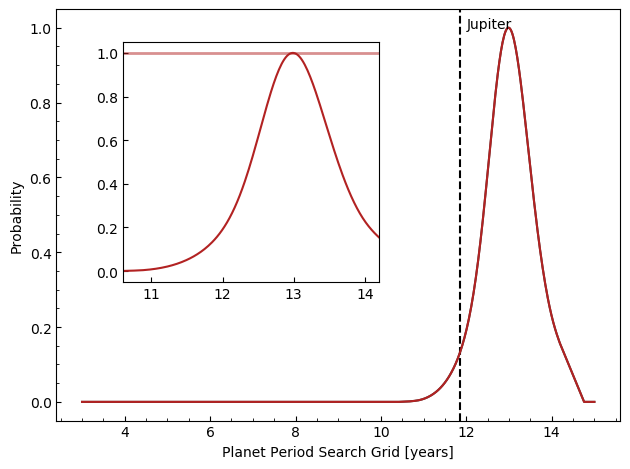

In [223]:
plot_likelihood(60.0,20.0,"EMB","p3","p3",500)

### Linear Fit to Posterior mean and/or std

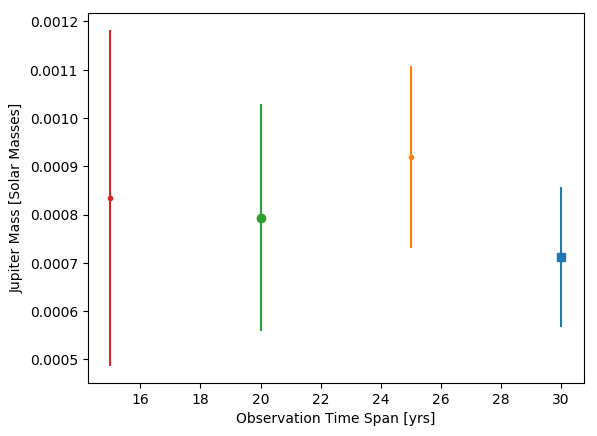

PyObject Text(24.000000000000014, 0.5, 'Jupiter Mass [Solar Masses]')

In [32]:
plot_col(11)
ylabel("Jupiter Mass [Solar Masses]")

In [154]:
sqrt(0.26456289315602766^2 + 0.010912818973584851^2)

0.2647878661363431

### 2-planet MCMC

In [20]:
include("MCMC.jl")

MCMC (generic function with 1 method)

In [21]:
1-sum(m_33["ntrans"][1:2] )/2 * log(667.8479408806473)
# Nobs = sum()

-259.1624205684809

In [23]:
MCMC("MCMC/p2_mcmc30.0s30.0yrs.jld2",[4.513519229108455e-6, 224.70077801541302, 2.4335037687537777e6, -0.0175050266179791, -0.025801638584714393, 2.964754129377914e-6, 365.25643897142635, 2.4336244077652446e6, 0.003030566580559538, -0.01953468392084722],
    -259.1624205684809,10000,50,2,m_33["ntrans"][1:2],m_33["tt0"],m_33["tt"],m_33["sigtt"],true,true)

Parameters from fit: [4.513519229108455e-6, 224.70077801541302, 2.4335037687537777e6, -0.0175050266179791, -0.025801638584714393, 2.964754129377914e-6, 365.25643897142635, 2.4336244077652446e6, 0.003030566580559538, -0.01953468392084722]
Maximum log Prob from fit: -259.1624205684809
Step: 193 Walker: 42 Trial Log Prob: 426.49314303794404 Prob: 1.2710845222989337e-7 Frac: 0.4260526861646961
Step: 293 Walker: 34 Trial Log Prob: 473.82203892999183 Prob: 1.005490785208814 Frac: 0.4230558972256389
Step: 370 Walker: 49 Trial Log Prob: 493.2463334225217 Prob: 0.25319213944931385 Frac: 0.4233201794691605
Step: 572 Walker: 36 Trial Log Prob: 517.5322863903355 Prob: 0.001594701592098923 Frac: 0.40918631497936053
Step: 584 Walker: 35 Trial Log Prob: 513.5953264857309 Prob: 0.4843221013987992 Frac: 0.4091485352064417
Step: 608 Walker: 46 Trial Log Prob: 518.8336758842289 Prob: 0.07254184825454627 Frac: 0.4077839189367022
Number of steps: 1000 Acceptance Rate: 0.39362
Step: 1001 Walker: 10 Trial Lo

([75.28769233479389 219.3594460186767 … 516.4881994945473 516.4881994945473; -444.65886672058883 -179.91995136093811 … 518.9664783752439 518.9664783752439; … ; -6.207035479125622 8.101604707805357 … 515.0457994095664 516.7171326214575; -590.5867961707044 -590.5867961707044 … 516.3621801274104 514.7776681213268], [4.445630411721898e-6 4.415787023431983e-6 … 4.206582338987755e-6 4.206582338987755e-6; 4.422629575203517e-6 4.434748781693544e-6 … 4.668535978959624e-6 4.668535978959624e-6; … ; 4.421228165235299e-6 4.487950235042027e-6 … 5.371583333236327e-6 5.212825825179325e-6; 4.358749104252416e-6 4.358749104252416e-6 … 4.278023225622351e-6 4.2086541016973845e-6]

[224.700772340187 224.7007758152718 … 224.70077643355427 224.70077643355427; 224.7007664603429 224.700765708711 … 224.70077526896767 224.70077526896767; … ; 224.7007948253631 224.7007858316187 … 224.70077304449623 224.70077747636677; 224.70077991916642 224.70077991916642 … 224.70078876795066 224.70079300411328]

[2.43350376875570